In [1]:
import sys
import os

# 1. Get current path (examples folder)
current_dir = os.getcwd()

# 2. Add 'src' to the path (NOT the project root)
# This mimics how pip installs the package
src_path = os.path.abspath(os.path.join(current_dir, '..', 'src'))

if src_path not in sys.path:
    sys.path.append(src_path)

from landmark_triangulation.core import LandmarkTriangulation



Loaded 300 samples from ../data/synthetic_data_sorted.csv
Running Sine Landmark Reduction...
SLR finished in 0.0324 seconds.


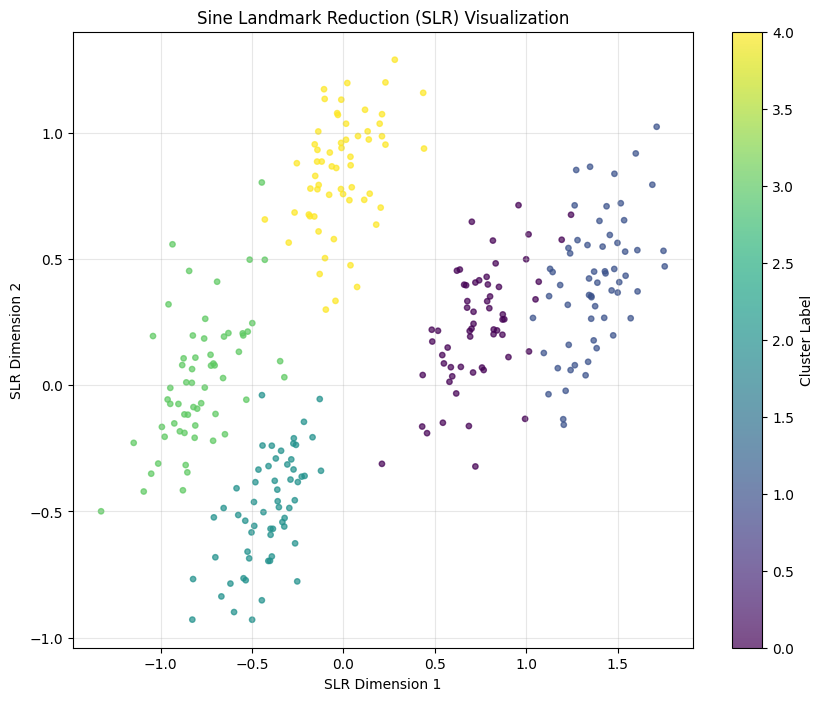

Running t-SNE (this might take a few seconds)...
t-SNE finished in 5.9077 seconds.


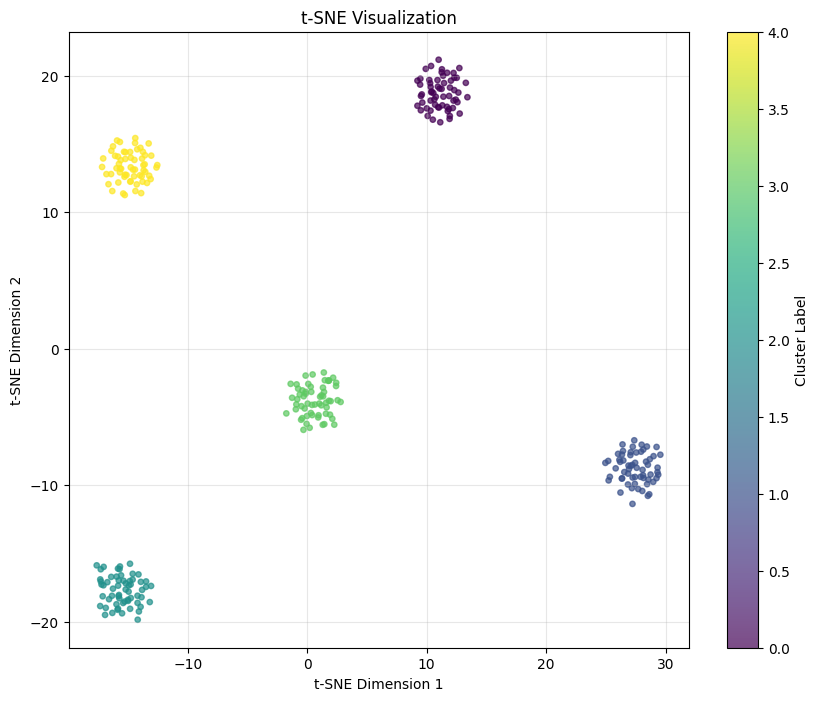

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Import your custom package modules
# Now this will work
from landmark_triangulation.core import LandmarkTriangulation



# --- Configuration ---
FILENAME = "../data/synthetic_data_sorted.csv"

def load_data(filepath):
    df = pd.read_csv(filepath)
    y = df['cluster_label'].values
    X = df.drop(columns=['cluster_label']).values
    return X, y

def main():
    # 1. Load Data
    try:
        X, y = load_data(FILENAME)
        print(f"Loaded {len(X)} samples from {FILENAME}")
    except FileNotFoundError:
        print(f"Error: {FILENAME} not found. Run step1_generate_data.py first.")
        return


    # ---------------------------------------------------------
    # B. Run SLR (Choose your fighter)
    # ---------------------------------------------------------
    print("Running Sine Landmark Reduction...")
    start_time = time.time()


    # Mode 1: Original Random Sampling (Default)
    slr = LandmarkTriangulation(n_landmarks=150, landmark_mode="random")

    # Mode 2: Pure Synthetic (The "Ghost" Sine Waves)
    #slr = LandmarkTriangulation(n_landmarks=150, landmark_mode="synthetic")

    # Mode 3: Your New Idea (Manifold Snapping)
    #slr = LandmarkTriangulation(n_landmarks=150, landmark_mode="hybrid")


    X_slr = slr.fit_transform(X)

    end_time = time.time()
    print(f"SLR finished in {end_time - start_time:.4f} seconds.")

    # C. Plot Results
    plt.figure(figsize=(10, 8))

    # Scatter plot using the new X_slr coordinates
    scatter = plt.scatter(X_slr[:, 0], X_slr[:, 1], c=y, cmap='viridis', alpha=0.7, s=15)

    plt.colorbar(scatter, label='Cluster Label')
    plt.title("Sine Landmark Reduction (SLR) Visualization")
    plt.xlabel("SLR Dimension 1")
    plt.ylabel("SLR Dimension 2")
    plt.grid(True, alpha=0.3)
    plt.show()

    # ---------------------------------------------------------
    # 5. Run t-SNE (The Benchmark)
    # ---------------------------------------------------------
    print("Running t-SNE (this might take a few seconds)...")
    start_time = time.time()

    tsne = TSNE(n_components=2, init='pca', learning_rate='auto', random_state=42)
    X_embedded = tsne.fit_transform(X)

    end_time = time.time()
    print(f"t-SNE finished in {end_time - start_time:.4f} seconds.")

    # 5.2 Plot t-SNE Results
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis', alpha=0.7, s=15)

    plt.colorbar(scatter, label='Cluster Label')
    plt.title("t-SNE Visualization")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")

    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()